# Auteurs : Boutaleb Fouad / Akeniouene Abderrahmane

## TP2 : Classification avec LDA & QDA

Commençons avec quelques préparatifs :

In [1]:
import csv
from pylab import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt


## Charger les données synthétiques
Charger les données d'entraînement et de test à partir des fichiers `synth_train.txt` et
`synth_test.txt`. 
Les targets appartiennent à  $\mathcal{Y} = \left\lbrace 0;1 \right\rbrace$ et les inputs vivent dan $\mathbb{R}^2$.
Il y a 200 données d'apprentissage et 200 de test.

* La première colonne contient les labels, 
* Les colonnes 2 & 3 contiennent les vecteurs d'entrée.

Définissez des numpy arrays 2D `X_train` et `X_test` contenant les inputs de train et de test respectivement. Même chose avec les labels et deux autres numpy arrays 1D `y_train` et `y_test`.

`X_train` possède 200 lignes et 2 colonnes

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

X_train = train[:,1:]
X_test = test[:,1:]
y_train = train[:,0]
y_test = test[:,0]


## Rappel des étapes de LDA :
Pour l'apprentissage :
* estimation de la proba  $\pi$ d'appartenance à la classe $y=1$,
* estimation des vecteurs moyens $\mu_0$ et $\mu_1$ pour chaque classe, 
* estimation matrices de covariances empiriques  $\Sigma_0$ et $\Sigma_1$ pour chaque classe,
* calcul de leur combinaison convexe $\Sigma = (1-\pi) \Sigma_0 + \pi \Sigma_1$,

Pour la prédiction pour une input $\mathbf{x}$ donnée :
* calcul des probabilités d'appartenance aux classe 0 et 1 : $p(Y=0,X=\mathbf{x})$ et $p(Y=1,X=\mathbf{x})$,
* élection de la classe prédite $\hat{y}$ qui maximise ces deux probabilités

On rappelle que dans le modèle de la LDA $p(Y=i,X=\mathbf{x}) = p(Y=i) \times \mathcal{N}(\mu_i, \Sigma)(\mathbf{x}) $.

On rappelle aussi qu'en supposant que $\pi = 1- \pi  = \frac{1}{2}$, alors la frontière de décision passe en le point $\frac{\mu_0 + \mu_1}{2} $ et est orthogonale au vecteur $\mu_1 - \mu_0$.


## Travail : 
1. Créer une classe python correspondant à LDA. Les paramètres à apprendre seront des attributs. Une méthode `fit`  se chargera de l'estimation des paramètres. Une méthode `predict` fournira une prédiction pour une input $\mathbf{x}$ donnée.
2. Entraîner une instance `lda` votre classe LDA sur les données synthétique d'apprentissage.
3. Calculer le taux de bonne classification obtenu sur l'ensemble de test. 
4. Modifier la méthode `predict` pour qu'elle fournisse une seconde sortie : la proba conditionelle $p(Y=1|\mathbf{x})= \frac{p(X=\mathbf{x},Y=1)}{p(X=\mathbf{x},Y=0) + p(X=\mathbf{x},Y=1)}$.
5. On rappelle que QDA est un algorithme cousin de LDA pour lequel les gaussiennes ne partagent plus la même matrice $\Sigma$ mais utilisent respectivement $\Sigma_0$ et $\Sigma_1$. Créer une classe QDA.
6. Entraîner et tester votre classe QDA sur les données synthétiques et comparer les performances vis à vis de LDA.

_Indication 1 : Les matrices "sigma" sont toutes de taille 2x2 dans ce TP._




In [33]:
class LDA:
    def __init__(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.means,self.covmat= self.fit(self.X_train,self.y_train)
    
    def fit(self,Xl,yl):
        a = np.unique(yl)
        means = np.zeros((len(a), Xl.shape[1]))
        for i in a:
            x1 = Xl[np.where(yl == i)[0]]
            means[int(i)-1] = x1.mean(axis=0)
        covmat = np.cov(Xl.T)
        return means, covmat

    def predict(self,Xtest):
        print(self.means.shape[1])
        g = 1 / np.sqrt((2*np.pi**self.means.shape[1])*det(self.covmat))
        ll = np.zeros((Xtest.shape[0], self.means.shape[0]))
        for i in range(Xtest.shape[0]):
            for h in range(self.means.shape[0]):
                b = Xtest[i, :] - self.means[int(h) - 1]
                print(Xtest[i, :], self.means[int(h) - 1], b)
                t = (-1/2)*np.dot(np.dot(b.T, inv(self.covmat)), b)
                ll[i,int(h)-1] = g * np.e**t 
                #print(i,h, b, g, t)

        

        ypred = []
        ypred2 = []
        for row in ll:
            ypred.append(list(row).index(max(list(row)))+1)
            ypred2.append(row[0]/(row[0]+row[1]))
        return np.array(ypred),np.array(ypred2)
    
    def accuracy(self,ytest,ypred):
        acc = 0
        for k in range(len(ypred)):
            if ypred[k] == ytest[k]:
                acc += 1
        acc = acc / len(ypred)
        return acc
        

In [34]:
lda = LDA(X_train,y_train)
ypred,proba_cond=lda.predict(X_test)
acc=lda.accuracy(y_test,ypred)
acc

2
[0.54837733 1.2213453 ] [0.02868973 1.04424548] [0.5196876  0.17709983]
[0.54837733 1.2213453 ] [-1.18350693  1.78655437] [ 1.73188426 -0.56520906]
[-0.51618236  1.56239592] [0.02868973 1.04424548] [-0.54487208  0.51815045]
[-0.51618236  1.56239592] [-1.18350693  1.78655437] [ 0.66732458 -0.22415844]
[-0.92877833  0.92107217] [0.02868973 1.04424548] [-0.95746806 -0.12317331]
[-0.92877833  0.92107217] [-1.18350693  1.78655437] [ 0.2547286 -0.8654822]
[0.07000405 0.61976747] [0.02868973 1.04424548] [ 0.04131432 -0.42447801]
[0.07000405 0.61976747] [-1.18350693  1.78655437] [ 1.25351098 -1.1667869 ]
[0.26702843 1.10944064] [0.02868973 1.04424548] [0.23833871 0.06519516]
[0.26702843 1.10944064] [-1.18350693  1.78655437] [ 1.45053536 -0.67711373]
[-0.57664073  1.02574324] [0.02868973 1.04424548] [-0.60533046 -0.01850223]
[-0.57664073  1.02574324] [-1.18350693  1.78655437] [ 0.6068662  -0.76081112]
[-0.57199822  0.97485442] [0.02868973 1.04424548] [-0.60068794 -0.06939106]
[-0.57199822  0.

[0.4057391  1.17989595] [-1.18350693  1.78655437] [ 1.58924603 -0.60665841]
[-0.05152593  1.8148232 ] [0.02868973 1.04424548] [-0.08021566  0.77057772]
[-0.05152593  1.8148232 ] [-1.18350693  1.78655437] [1.131981   0.02826883]
[-1.45041108  1.62295012] [0.02868973 1.04424548] [-1.47910081  0.57870464]
[-1.45041108  1.62295012] [-1.18350693  1.78655437] [-0.26690415 -0.16360425]
[-0.79777541  1.2366062 ] [0.02868973 1.04424548] [-0.82646514  0.19236072]
[-0.79777541  1.2366062 ] [-1.18350693  1.78655437] [ 0.38573152 -0.54994817]
[-0.42044112  0.88404335] [0.02868973 1.04424548] [-0.44913085 -0.16020213]
[-0.42044112  0.88404335] [-1.18350693  1.78655437] [ 0.76306581 -0.90251101]
[0.14873009 2.90052858] [0.02868973 1.04424548] [0.12004036 1.8562831 ]
[0.14873009 2.90052858] [-1.18350693  1.78655437] [1.33223702 1.11397421]
[-1.65439614  1.66317302] [0.02868973 1.04424548] [-1.68308587  0.61892755]
[-1.65439614  1.66317302] [-1.18350693  1.78655437] [-0.47088921 -0.12338134]
[0.1230997

0.935

Si vous avez correctement programmé votre classe LDA et que `lda` en est une instance alors le code ci-dessous doit afficher la carte de probabilité d'appartenance à la classe n°1. 

Vérifier la cohérence du modèle appris.

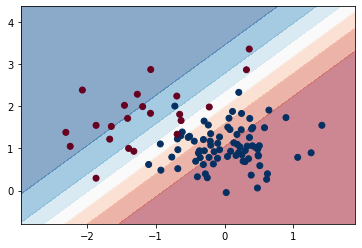

In [92]:
import matplotlib.pyplot as plt

X = np.vstack((X_train,X_test))
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
_,Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
cm = plt.cm.RdBu
plt.contourf(xx, yy, Z.reshape((xx.shape)), cmap=cm, alpha=.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm)


In [106]:
class QDA:
    def __init__(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.means,self.covmats= self.fit(self.X_train,self.y_train)
    
    def fit(self,X,y):
        covmats = []
        labels = np.unique(y)
        means = np.zeros([labels.shape[0],X.shape[1]])

        for i in range(labels.shape[0]):
            m = np.mean(X[np.where(y == labels[i])[0],],axis=0)
            means[i,] = m
            covmats.append(np.cov(np.transpose(X[np.where(y == labels[i])[0],])))
        return means, covmats

    def predict(self,Xtest):
        ll = np.zeros((Xtest.shape[0], self.means.shape[0]))
        for i in range(Xtest.shape[0]):
            for h in range(self.means.shape[0]):
                index = int(h)-1
                b = Xtest[i, :] - self.means[index]
                t = (-1/2)*np.dot(np.dot(b.T, inv(self.covmats[index])), b)
                g = 1 / np.sqrt((2*np.pi**self.means.shape[1])*det(self.covmats[index]))
                ll[i,index] = g * np.e**t 
        ypred2 = []
        ypred = []
        for row in ll:
            ypred.append(list(row).index(max(list(row)))+1)
            ypred2.append(row[0]/(row[0]+row[1]))
        return np.array(ypred),np.array(ypred2)
    
    def accuracy(self,ytest,ypred):
        acc = 0
        for k in range(len(ypred)):
            if ypred[k] == ytest[k]:
                acc += 1
        acc = acc / len(ypred)
        return acc
        

In [107]:
qda = QDA(X_train,y_train)
ypred,ypred2=qda.predict(X_test)
acc=qda.accuracy(y_test,ypred)
acc

0.955

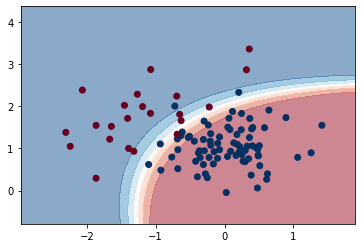

In [108]:
import matplotlib.pyplot as plt

X = np.vstack((X_train,X_test))
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
_,Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
cm = plt.cm.RdBu
plt.contourf(xx, yy, Z.reshape((xx.shape)), cmap=cm, alpha=.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm)


### remarque :
nous remarquons que LDA offre une précision moins importante qu'avec QDA 

## Remarque : LDA & QDA dans le module scikit-learn 

Le module `scikit-learn` propose de nombreux algorithmes de machine learning assez facile d'emploi. Pour LDA et QDA, vous pouvez jeter un oeil au tutoriel suivant : http://scikit-learn.org/stable/modules/lda_qda.html 

Ces implémentations peuvent vous servir à valider votre code. Il n'est pas obligatoire de mener la comparaison.


